# Analyzing scaling with mass 
October 13, 2021 
Venkitesh Ayyar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
# sys.path.append('.')
from modules_image_analysis import *

In [3]:
%matplotlib widget

In [4]:
from ipywidgets import *

In [5]:
# Load data
def f_get_data(fname):
    arr=np.loadtxt(fname,delimiter=',',dtype=str)
    arr_iters=arr[:,0].astype(int) # First element is iteration number
    arr1=arr[:,1:-1].astype(float)  # Skip last element (null string) and first (iteration)
    del(arr)
    print(arr1.shape)
    L=int(np.sqrt(arr1.shape[1])) # Get lattice size
    num=arr1.shape[0]
    print(L)
    # a3=arr1.reshape(134,L,L) :  simple reshape doesn't do it in the correct order
    ## Reshape to 2D image
    arr2=np.empty((num,L,L),dtype=float)
    for i in range(num): 
        for x in range(L):
            for y in range(L):
                arr2[i,x,y]=arr1[i,x+y*L]

    print(arr2.shape)
    
    return arr2


def f_rescale(arr,mean):
    lst=[np.abs((i-mean)/mean) for i in arr]
    return np.array(lst)

In [ ]:
fname='../results_phi.txt'
fname='../results_residue.txt'
a1=f_get_data(fname)

In [62]:
arr_type='phi'
arr_type='residue'
fname='../results_{0}_mg4levels.txt'.format(arr_type)
print(fname)
a1=f_get_data(fname)

fname='../results_{0}_mg-1level.txt'.format(arr_type)
a2=f_get_data(fname)

fname='../results_{0}_mgslow.txt'.format(arr_type)
a3=f_get_data(fname)

fname='../results_{0}_gs.txt'.format(arr_type)
a4=f_get_data(fname)

../results_residue_mg4levels.txt
(2, 1024)
32
(2, 32, 32)
(130, 1024)
32
(130, 32, 32)
(1286, 1024)
32
(1286, 32, 32)
(2000, 1024)
32
(2000, 32, 32)


In [63]:
k=4
print(a1[-1,k,k],a2[3,k,k],a3[-1,k,k],a4[-1,k,k])

0.0 0.007611 0.0 5e-06


## Plots

In [ ]:
# f_plot_grid(samples[:16],cols=4)
# f_pixel_intensity(samples[:10])
# f_plot_intensity_grid(samples[:20],cols=5)
# f_get_power_spectrum(img)
# f_compute_spectrum(samples[:100])
# f_compare_spectrum([samples[:100],samples[100:200]],['0-100','100-200'])


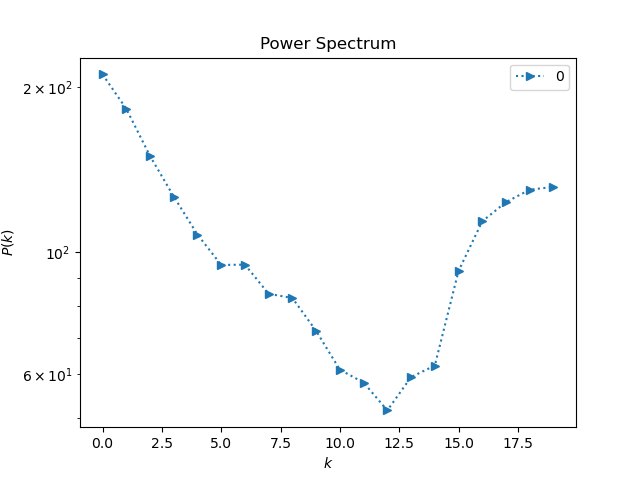

In [64]:
img=a1[:][::200]
step=1
idxs=range(0,img.shape[0],step)
l1=[img[i:i+1] for i in idxs]
l2=[str(i) for i in idxs]
# print(l2)
# f_compare_spectrum([a1[:10],a1[-10:]],['a','last'])
f_compare_spectrum(l1,l2)

In [ ]:
# f_compare_pixel_intensity(l1,l2)

## Convergence of spectral values

In [65]:
def f_spectrum(arr):
    F1 = fftpack.fft2((arr))
    F2 = fftpack.fftshift(F1)
    ### Absolute value of F-transform
    F2 = np.abs(F2)**2
    
    return F2 

def f_batch_spectrum(arr):
    P_k=[f_spectrum(i) for i in arr]
    return np.array(P_k)



In [66]:
# ans=f_spectrum(a1[0])
a_spec=f_batch_spectrum(a3)
print(a_spec.shape)

(1286, 32, 32)


In [67]:
# def f_plot_spec_rad_iteration(arr,k):
#     plt.figure()
#     plt.plot(arr[1:,k],marker='o',linestyle='')
#     plt.xlabel('Iteration')
#     plt.show()

In [68]:
def f_plot_spec_iteration(arr,kx,ky):
    plt.figure()
    plt.plot(arr[1:,kx,ky],marker='o',linestyle='')
    plt.xlabel('Iteration')
    plt.yscale('log')
    plt.show()
    
    
# f_plot_spec_iteration(a_spec,42,42)
interact(f_plot_spec_iteration,arr=fixed(a_spec[:500]),kx=IntSlider(min=0,max=a_spec.shape[1]-1,step=1),ky=IntSlider(min=0,max=a_spec.shape[2]-1,step=1))

interactive(children=(IntSlider(value=0, description='kx', max=31), IntSlider(value=0, description='ky', max=3…

<function __main__.f_plot_spec_iteration(arr, kx, ky)>

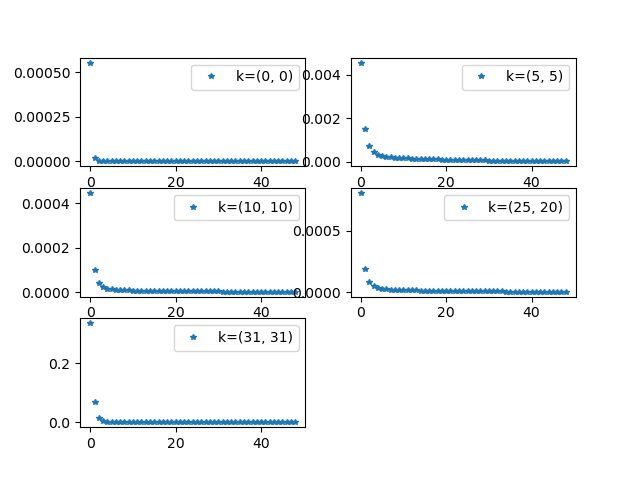

In [69]:
def f_grid_iter_plot(arr,klist):
    fig=plt.figure()

    size=len(klist)
    cols=max(size//2,1)
    cols=min(cols,4)
    rows=int(np.ceil(size/cols))
    # rows,cols=2,2
    
    for count,k in enumerate(klist):
        kx,ky=k[0],k[1]
        fig.add_subplot(rows,cols,count+1)
        plt.plot(arr[1:,kx,ky], marker='*',markersize=4,linestyle='',label="k="+str(k))
        plt.legend()
    plt.show()


klist=[(0,0),(5,5),(10,10),(25,20),(31,31)]
f_grid_iter_plot(a_spec[:50],klist)


## Compare different runs

In [44]:
soln=a1[-1]
a1=f_rescale(a1,soln)
a2=f_rescale(a2,soln)
a3=f_rescale(a3,soln)
a4=f_rescale(a4,soln)

In [45]:
aspec_lst=[f_batch_spectrum(arr) for arr in [a1,a2,a3,a4]]
labels_lst=['mg_4levels','mg-1level-10GS','mg-1level_1GS','No MG']

In [46]:
def f_compare_runs(arrlist,labellist,kx,ky):
    fig=plt.figure()

    size=len(labellist)
    cols=max(size//2,1)
    cols=min(cols,4)
    rows=int(np.ceil(size/cols))
    # rows,cols=2,2
    
    mrkrs=['o','*','v','x','H','D','H','s','8','p']
    for count,(lbl,mrkr) in enumerate(zip(labellist,mrkrs)):
        a_spec=arrlist[count]
        # fig.add_subplot(rows,cols,count+1)
        plt.plot(a_spec[1:,kx,ky], marker=mrkr,markersize=5,linestyle='',label=lbl)
        # plt.plot((aspec_lst[0][-1,kx,ky]-a_spec[1:,kx,ky])/(aspec_lst[0][-1,kx,ky]), marker=mrkr,markersize=5,linestyle='',label=lbl)

        plt.legend()
    plt.yscale('log')
    plt.title('Fourier coefficient %s-%s'%(kx,ky))
    plt.show()

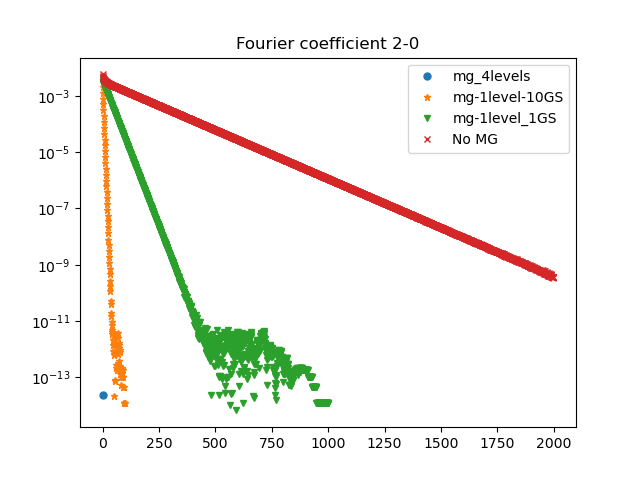

In [48]:
f_compare_runs(aspec_lst[:],labels_lst[:],2,0)

In [53]:
size=a1.shape[-1]-1
interact(f_compare_runs,arrlist=fixed(aspec_lst),labellist=fixed(labels_lst),kx=IntSlider(min=0,max=size,step=1),ky=IntSlider(min=0,max=size-1,step=1))



interactive(children=(IntSlider(value=0, description='kx', max=31), IntSlider(value=0, description='ky', max=3…

<function __main__.f_compare_runs(arrlist, labellist, kx, ky)>

In [33]:
[i.shape for i in aspec_lst]

[(2, 32, 32), (130, 32, 32), (1286, 32, 32), (2000, 32, 32)]

In [ ]:
2*30